In [1]:
from astropy.io import fits
from astropy.table import Table
import numpy as np
import matplotlib.pylab as plt 
import matplotlib.lines as mlines
from matplotlib.legend import Legend
from pythonds.basic.stack import Stack
from math import *
from sklearn.neighbors import KDTree
from lrg_plot_functions import *
from lrg_sum_functions import *
from cosmo_Calc import *
from divideByTwo import *
from read_data import *
from nearNeighbors import *
from scipy import stats
from astropy import stats
import healpy as hp
from localBKG_and_interlopersHEALPix import *
# import healpy as hpy
from makeCutoutTableFunc import *
from plotHistogramProjections3D import *
from read_bricks import *
from mpl_toolkits.axes_grid1 import make_axes_locatable
import random

In [2]:
# LRG data arrays

data_raLRG = np.load('/Users/mtownsend/Documents/LRG_Data/ra_LRG.npz')
raLRG = data_raLRG['ra_LRG']
print(raLRG.shape)

print('----')

data_decLRG = np.load('/Users/mtownsend/Documents/LRG_Data/dec_LRG.npz')
decLRG = data_decLRG['dec_LRG']
print(decLRG.shape)

print('----')

data_zLRG = np.load('/Users/mtownsend/Documents/LRG_Data/z_LRG.npz')
zLRG = data_zLRG['z_LRG']
print(zLRG.shape)

print('----')

data_gmagLRG = np.load('/Users/mtownsend/Documents/LRG_Data/gmag_LRG.npz')
gmagLRG = data_gmagLRG['gmag_LRG']
print(gmagLRG.shape)

print('----')

data_rmagLRG = np.load('/Users/mtownsend/Documents/LRG_Data/rmag_LRG.npz')
rmagLRG = data_rmagLRG['rmag_LRG']
print(rmagLRG.shape)

print('----')

data_zmagLRG = np.load('/Users/mtownsend/Documents/LRG_Data/zmag_LRG.npz')
zmagLRG = data_zmagLRG['zmag_LRG']
print(zmagLRG.shape)

print('----')

data_grcolorLRG = np.load('/Users/mtownsend/Documents/LRG_Data/grcolor_LRG.npz')
grcolorLRG = data_grcolorLRG['grcolor_LRG']
print(grcolorLRG.shape)

print('----')

data_rzcolorLRG = np.load('/Users/mtownsend/Documents/LRG_Data/rzcolor_LRG.npz')
rzcolorLRG = data_rzcolorLRG['rzcolor_LRG']
print(rzcolorLRG.shape)


(1823,)
----
(1823,)
----
(1823,)
----
(1823,)
----
(1823,)
----
(1823,)
----
(1823,)
----
(1823,)


In [3]:
# BKG data arrays

data_raBKG = np.load('/Users/mtownsend/Documents/LRG_Data/ra_BKG.npz')
raBKG = data_raBKG['ra_BKG']
print(raBKG.shape)

print('----')

data_decBKG = np.load('/Users/mtownsend/Documents/LRG_Data/dec_BKG.npz')
decBKG = data_decBKG['dec_BKG']
print(decBKG.shape)

print('----')

data_gmagBKG = np.load('/Users/mtownsend/Documents/LRG_Data/gmag_BKG.npz')
gmagBKG = data_gmagBKG['gmag_BKG']
print(gmagBKG.shape)

print('----')

data_rmagBKG = np.load('/Users/mtownsend/Documents/LRG_Data/rmag_BKG.npz')
rmagBKG = data_rmagBKG['rmag_BKG']
print(rmagBKG.shape)

print('----')

data_zmagBKG = np.load('/Users/mtownsend/Documents/LRG_Data/zmag_BKG.npz')
zmagBKG = data_zmagBKG['zmag_BKG']
print(zmagBKG.shape)

print('----')

data_grcolorBKG = np.load('/Users/mtownsend/Documents/LRG_Data/grcolor_BKG.npz')
grcolorBKG = data_grcolorBKG['grcolor_BKG']
print(grcolorBKG.shape)

print('----')

data_rzcolorBKG = np.load('/Users/mtownsend/Documents/LRG_Data/rzcolor_BKG.npz')
rzcolorBKG = data_rzcolorBKG['rzcolor_BKG']
print(rzcolorBKG.shape)



(517525,)
----
(517525,)
----
(517525,)
----
(517525,)
----
(517525,)
----
(517525,)
----
(517525,)


In [4]:
# combined LRG and BKG lists

data_ra = np.load('/Users/mtownsend/Documents/LRG_Data/ra_total.npz')
ra_total = data_ra['ra']
print(ra_total.shape)

print('----')

data_dec = np.load('/Users/mtownsend/Documents/LRG_Data/dec_total.npz')
dec_total = data_dec['dec']
print(dec_total.shape)

print('----')

data_gmag = np.load('/Users/mtownsend/Documents/LRG_Data/gmag_total.npz')
gmag_total = data_gmag['gmag']
print(gmag_total.shape)

print('----')

data_rmag = np.load('/Users/mtownsend/Documents/LRG_Data/rmag_total.npz')
rmag_total = data_rmag['rmag']
print(rmag_total.shape)

print('----')

data_zmag = np.load('/Users/mtownsend/Documents/LRG_Data/zmag_total.npz')
zmag_total = data_zmag['zmag']
print(zmag_total.shape)

print('----')

data_grcolor = np.load('/Users/mtownsend/Documents/LRG_Data/grcolor_total.npz')
grcolor_total = data_grcolor['grcolor']
print(grcolor_total.shape)

print('----')

data_rzcolor = np.load('/Users/mtownsend/Documents/LRG_Data/rzcolor_total.npz')
rzcolor_total = data_rzcolor['rzcolor']
print(rzcolor_total.shape)


(519348,)
----
(519348,)
----
(519348,)
----
(519348,)
----
(519348,)
----
(519348,)
----
(519348,)


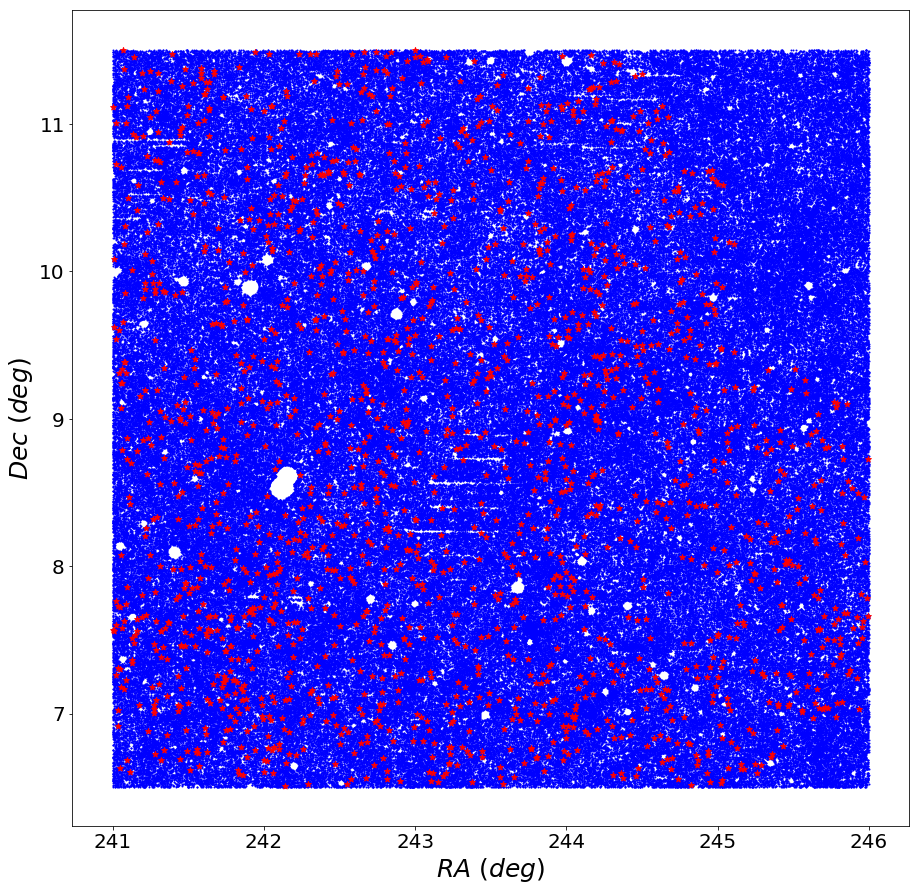

In [30]:
fig, ax = plt.subplots(1, 1, figsize=(15,15))
ax.scatter(raBKG, decBKG, color='blue', s=1)
ax.scatter(raLRG, decLRG, color='red', marker='*')
ax.set_xlabel(r'$RA$ $(deg)$', fontsize=25)
ax.set_ylabel(r'$Dec$ $(deg)$', fontsize=25)
ax.xaxis.set_tick_params(labelsize=20)
ax.yaxis.set_tick_params(labelsize=20)

plt.savefig('/Users/mtownsend/Desktop/edr.jpg')

plt.show()

In [22]:
# create color-color-mag plot

rz_edges = np.array([-1.8027077, -1.5527076721191406, -1.3027076721191406, -1.0527076721191406, -0.8027076721191406, -0.5527076721191406, -0.3027076721191406, -0.052707672119140625, 0.19729232788085938, 0.4472923278808594, 0.6972923278808594, 0.9472923278808594, 1.1972923278808594, 1.4472923278808594, 1.6972923278808594, 1.9472923278808594, 2.1972923278808594, 2.4472923278808594, 2.6972923278808594, 2.9472923278808594, 3.1972923278808594, 3.4472923278808594, 3.6972923278808594, 3.9472923278808594, 4.197292327880859, 4.447292327880859, 4.697292327880859, 4.947292327880859, 5.197292327880859, 5.447292327880859, 5.697292327880859, 5.947292327880859, 6.197292327880859, 6.447292327880859, 6.697292327880859, 6.947292327880859, 7.197292327880859, 7.447292327880859, 7.697292327880859, 7.947292327880859, 8.19729232788086, 8.44729232788086, 8.69729232788086, 8.94729232788086, 9.19729232788086, 9.44729232788086, 9.69729232788086, 9.94729232788086, 10.19729232788086, 10.44729232788086])
gr_edges = np.array([-6.5846786, -6.234678649902344, -5.8846786499023445, -5.534678649902345, -5.184678649902345, -4.8346786499023455, -4.484678649902346, -4.134678649902346, -3.784678649902346, -3.434678649902346, -3.084678649902346, -2.734678649902346, -2.384678649902346, -2.0346786499023457, -1.6846786499023456, -1.3346786499023455, -0.9846786499023455, -0.6346786499023456, -0.2846786499023456, 0.06532135009765438, 0.41532135009765436, 0.7653213500976543, 1.1153213500976542, 1.4653213500976543, 1.8153213500976544, 2.1653213500976545, 2.5153213500976546, 2.8653213500976547, 3.2153213500976547, 3.565321350097655, 3.915321350097655, 4.265321350097655, 4.615321350097655, 4.965321350097654, 5.315321350097654, 5.665321350097654, 6.015321350097653, 6.365321350097653, 6.7153213500976525, 7.065321350097652, 7.415321350097652, 7.7653213500976515, 8.115321350097652, 8.465321350097652, 8.815321350097651, 9.165321350097651, 9.51532135009765, 9.86532135009765, 10.21532135009765, 10.56532135009765])

zmaginit = 13.
zmagfin = 23.
interval = 0.2
zmag_num = (zmagfin-zmaginit)/interval
zmag_edges, step = np.linspace(zmaginit, zmagfin, num=int(zmag_num), retstep=True)
print(type(zmag_edges))
print(zmag_edges)

# edges = []
# edges.append(rz_edges)
# edges.append(zmag_edges)
# edges.append(gr_edges)


H1, nouse_edges = np.histogramdd((rzcolor_total, grcolor_total, zmag_total), bins=(rz_edges, gr_edges, zmag_edges), density=False)


<class 'numpy.ndarray'>
[13.         13.20408163 13.40816327 13.6122449  13.81632653 14.02040816
 14.2244898  14.42857143 14.63265306 14.83673469 15.04081633 15.24489796
 15.44897959 15.65306122 15.85714286 16.06122449 16.26530612 16.46938776
 16.67346939 16.87755102 17.08163265 17.28571429 17.48979592 17.69387755
 17.89795918 18.10204082 18.30612245 18.51020408 18.71428571 18.91836735
 19.12244898 19.32653061 19.53061224 19.73469388 19.93877551 20.14285714
 20.34693878 20.55102041 20.75510204 20.95918367 21.16326531 21.36734694
 21.57142857 21.7755102  21.97959184 22.18367347 22.3877551  22.59183673
 22.79591837 23.        ]


In [23]:
DTT_Gyr, age_Gyr, zage_Gyr, DCMR_Mpc, DCMR_Gyr, DA_Mpc, DA_Gyr, kpc_DA, DL_Mpc, DL_Gyr, V_Gpc = cosmoCalcfunc(zLRG)

print("end cosmoCalc")


end cosmoCalc


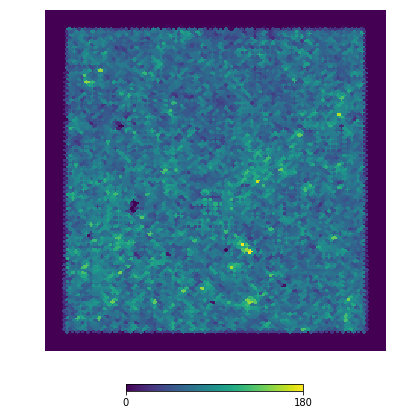

length phi:  519348


In [24]:
# Make HEALPix map using just RA/Dec; end up with a density plot

nside = 1024
npixel = hp.nside2npix(nside)

# Convert ra/dec into theta/phi
theta = []
phi = []

for i in range(len(ra_total)):
    theta.append(np.radians(90. - dec_total[i]))
    phi.append(np.radians(ra_total[i]))
    
m = hp.ang2pix(nside, theta, phi)
map_ = np.bincount(m, minlength=npixel)
hp.gnomview(map_, xsize=225, rot=(-116.5, 9), flip='geo', cmap='viridis', notext=True, title="")
# plt.rcParams.update({'font.size':20})
# plt.savefig('/Users/mtownsend/Desktop/survey-density.jpg')
# plt.savefig('/Users/mtownsend/Desktop/NewPaperPlots/HEALPix-survey-density-after-zmag-cuts-v1.pdf')
plt.show()

print('length phi: ', len(phi))

# Convert angles theta and phi to pixel numbers

pixnums = hp.ang2pix(nside, theta, phi, nest=True)


In [25]:
distance = 0.5 # must be in Mpc

distance_kpc, near, gal_tree, dist, index, nn1 = nearNeighbor(distance, kpc_DA, raLRG, decLRG, raBKG, decBKG, zmagLRG, zmagBKG, rzcolorLRG, rzcolorBKG, grcolorLRG, grcolorBKG, nouse_edges)

print('end nearNeighbor')


end nearNeighbor


mean number of near neighbors is 47.37410861217773
median number of near neighbors is 41.0
standard deviation of near neighbor is 23.851534505334982
standard error is 0.5587816536680068


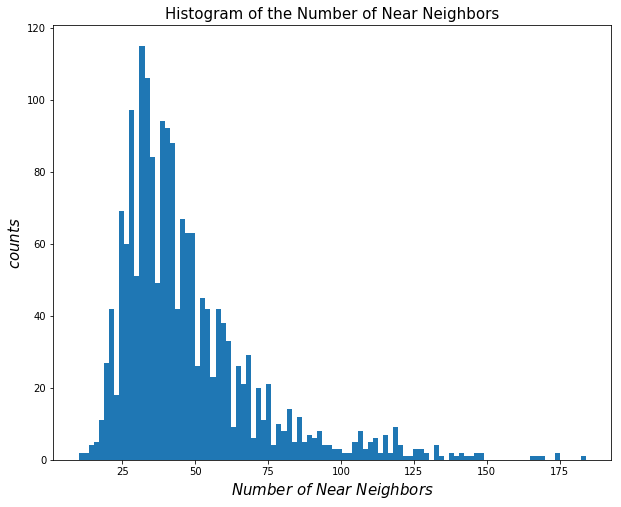

In [26]:
totalNear(near)

plt.show()


In [27]:
inner_dist = 0.4 # in deg
outer_dist = 0.5 # in deg

Nbkg, indices, omega, localBKG = localBKG_and_interlopersHEALPix(nside, inner_dist, outer_dist, raLRG, decLRG, pixnums, zmag_total, rzcolor_total, grcolor_total, nouse_edges, distance_kpc, kpc_DA)

omega = np.array(omega)

print("end bkg")

end bkg


mean number of interlopers is 36.48040431977798
median number of interlopers is 32.26296824728518
standard deviation of interloper is 17.293140891821423
standard error is 0.4051349342946642


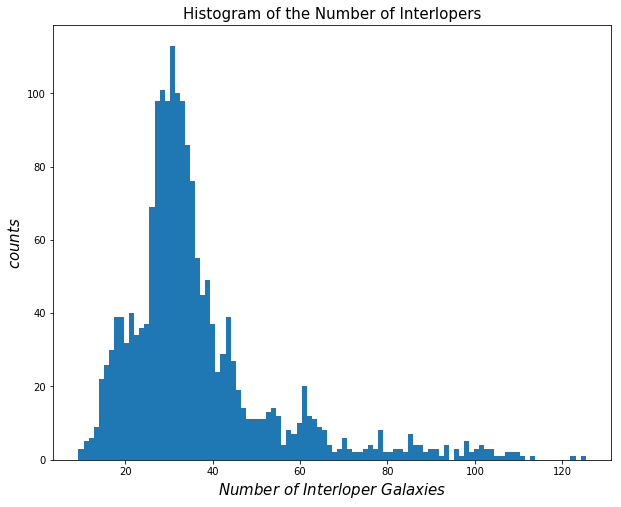

In [31]:
totalNbkg(Nbkg)

plt.show()

Nbkg = np.array(Nbkg)

In [32]:
Nsat = np.array(near) - np.array(Nbkg)

print(Nsat[0].shape)
print("end Nsat")

(49, 49, 49)
end Nsat


In [33]:
Nsat35 = Nsat[np.where((zLRG >= 0.2) & (zLRG < 0.35))]
Nsat05 = Nsat[np.where((zLRG >= 0.35) & (zLRG < 0.5))]
Nsat65 = Nsat[np.where((zLRG >= 0.5) & (zLRG < 0.65))]

np.savez('/Users/mtownsend/Documents/LRG_Data/Nsat-3bins.npz', Nsat=Nsat, Nsat35=Nsat35, Nsat05=Nsat05, Nsat65=Nsat65)
data_Nsat = np.load('/Users/mtownsend/Documents/LRG_Data/Nsat-3bins.npz')
Nsat_total = data_Nsat['Nsat']
Nsat35 = data_Nsat['Nsat35']
Nsat05 = data_Nsat['Nsat05']
Nsat65 = data_Nsat['Nsat65']

print(Nsat_total.shape)
print(Nsat35.shape)
print(Nsat05.shape)
print(Nsat65.shape)


(1823, 49, 49, 49)
(309, 49, 49, 49)
(617, 49, 49, 49)
(897, 49, 49, 49)
